In [21]:
import numpy as np
import pandas as pd
import configparser
import sys
import tensorflow as tf
config = configparser.ConfigParser()
config.read('project.env')
module_path = config['global']['MODULE_PATH']
sys.path.append(module_path)

In [22]:
from trained_models.baseline import TrainedBaseline

In [23]:
data_prefix = "all_data"
model_prefix = "standardised_all_data"
###########
# DATASETS
###########
test_dir_path = config["global"]["TESTING_DATASETS_PATH"]
if test_dir_path[-1] not in ["\\", "/"]:
    test_dir_path += "/"

saved_objects_dir_path = config["global"]["SAVED_OBJECTS_PATH"]
if saved_objects_dir_path[-1] not in ["\\", "/"]:
    saved_objects_dir_path += "/"
# All
test_x = np.load("{}{}_test_x.npy".format(test_dir_path, data_prefix))
test_y = np.load("{}{}_test_y.npy".format(test_dir_path, data_prefix))
# Low
low_test_x = np.load("{}{}_low_test_x.npy".format(test_dir_path, data_prefix))
low_test_y = np.load("{}{}_low_test_y.npy".format(test_dir_path, data_prefix))
# Medium
medium_test_x = np.load("{}{}_medium_test_x.npy".format(test_dir_path, data_prefix))
medium_test_y = np.load("{}{}_medium_test_y.npy".format(test_dir_path, data_prefix))
# High
high_test_x = np.load("{}{}_high_test_x.npy".format(test_dir_path, data_prefix))
high_test_y = np.load("{}{}_high_test_y.npy".format(test_dir_path, data_prefix))
model = TrainedBaseline("{}_baseline".format(model_prefix))
model.set_scaler("{}{}_scaler.sav".format(saved_objects_dir_path, data_prefix))
model.set_model(tf.keras.models.load_model("{}{}_baseline.hdf5".format(saved_objects_dir_path, model_prefix)))

In [24]:
from tqdm import tqdm
from matplotlib import pyplot as plt

In [25]:
x, y = test_x, test_y
features = model.get_scaler().get_feature_names_out()

In [26]:
k = model.predict(x)
print(k[1])
print(y[1])

847/847 [==============================] - 26s 27ms/step
[10407.53876611 10501.49647197 10634.29706792 10780.73215314
 10920.13020736]
[[20785.   ]
 [ 8392.   ]
 [ 9505.   ]
 [11574.999]
 [12212.   ]]


In [27]:
def get_mape(true, predicted, epsilon=50):
    denominator = np.squeeze(true) + epsilon
    try:
        mape = np.mean(np.abs((np.squeeze(true) - predicted)/denominator))*100
    except Exception as e:
        print(e)
        mape = "n/a"
    return mape

In [28]:
def get_mse(true, predicted):
    mse = np.mean(np.power(np.squeeze(true)-predicted, 2))
    return mse

In [29]:
def get_mae(true, predicted):
    mae = np.mean(np.abs(np.squeeze(true)-predicted))
    return mae

In [30]:
results = []
print("Computing feature importance")

baseline_preds = model.predict(x)
baseline_mape = get_mape(y, baseline_preds)
baseline_mse = get_mse(y, baseline_preds)
baseline_mae = get_mae(y, baseline_preds)
results.append({"feature":"BASELINE", "mape":baseline_mape, "mse":baseline_mse, "mae":baseline_mae})

for k in tqdm(range(x.shape[2])):
    sav_col = x[:,:,k].copy()
    np.random.shuffle(x[:,:,k])
    important_preds = model.predict(x)
    mape = get_mape(y, important_preds)
    mse = get_mse(y, important_preds)
    mae = get_mae(y, important_preds)
    results.append({"feature":features[k], "mape": mape, "mse": mse, "mae":mae})
    x[:,:,k] = sav_col

result_df = pd.DataFrame(results)

Computing feature importance
847/847 [==============================] - 19s 22ms/step


  0%|          | 0/19 [00:00<?, ?it/s]

847/847 [==============================] - 22s 26ms/step


  5%|▌         | 1/19 [00:25<07:30, 25.02s/it]

847/847 [==============================] - 22s 25ms/step


 11%|█         | 2/19 [00:47<06:37, 23.39s/it]

847/847 [==============================] - 24s 25ms/step


 16%|█▌        | 3/19 [01:12<06:24, 24.02s/it]

847/847 [==============================] - 24s 29ms/step


 21%|██        | 4/19 [01:36<06:05, 24.36s/it]

847/847 [==============================] - 22s 25ms/step


 26%|██▋       | 5/19 [02:01<05:41, 24.36s/it]

847/847 [==============================] - 21s 25ms/step


 32%|███▏      | 6/19 [02:23<05:06, 23.61s/it]

847/847 [==============================] - 24s 28ms/step


 37%|███▋      | 7/19 [02:48<04:47, 23.98s/it]

847/847 [==============================] - 21s 25ms/step


 42%|████▏     | 8/19 [03:12<04:25, 24.11s/it]

847/847 [==============================] - 22s 25ms/step


 47%|████▋     | 9/19 [03:34<03:55, 23.52s/it]

847/847 [==============================] - 24s 25ms/step


 53%|█████▎    | 10/19 [03:59<03:34, 23.85s/it]

847/847 [==============================] - 22s 25ms/step


 58%|█████▊    | 11/19 [04:23<03:12, 24.04s/it]

847/847 [==============================] - 21s 25ms/step


 63%|██████▎   | 12/19 [04:45<02:44, 23.45s/it]

847/847 [==============================] - 21s 25ms/step


 68%|██████▊   | 13/19 [05:09<02:21, 23.52s/it]

847/847 [==============================] - 22s 27ms/step


 74%|███████▎  | 14/19 [05:32<01:57, 23.41s/it]

847/847 [==============================] - 22s 26ms/step


 79%|███████▉  | 15/19 [05:58<01:36, 24.11s/it]

847/847 [==============================] - 25s 26ms/step


 84%|████████▍ | 16/19 [06:24<01:13, 24.58s/it]

847/847 [==============================] - 25s 26ms/step


 89%|████████▉ | 17/19 [06:49<00:49, 24.82s/it]

847/847 [==============================] - 22s 26ms/step


 95%|█████████▍| 18/19 [07:14<00:24, 24.90s/it]

847/847 [==============================] - 22s 26ms/step


100%|██████████| 19/19 [07:37<00:00, 24.07s/it]


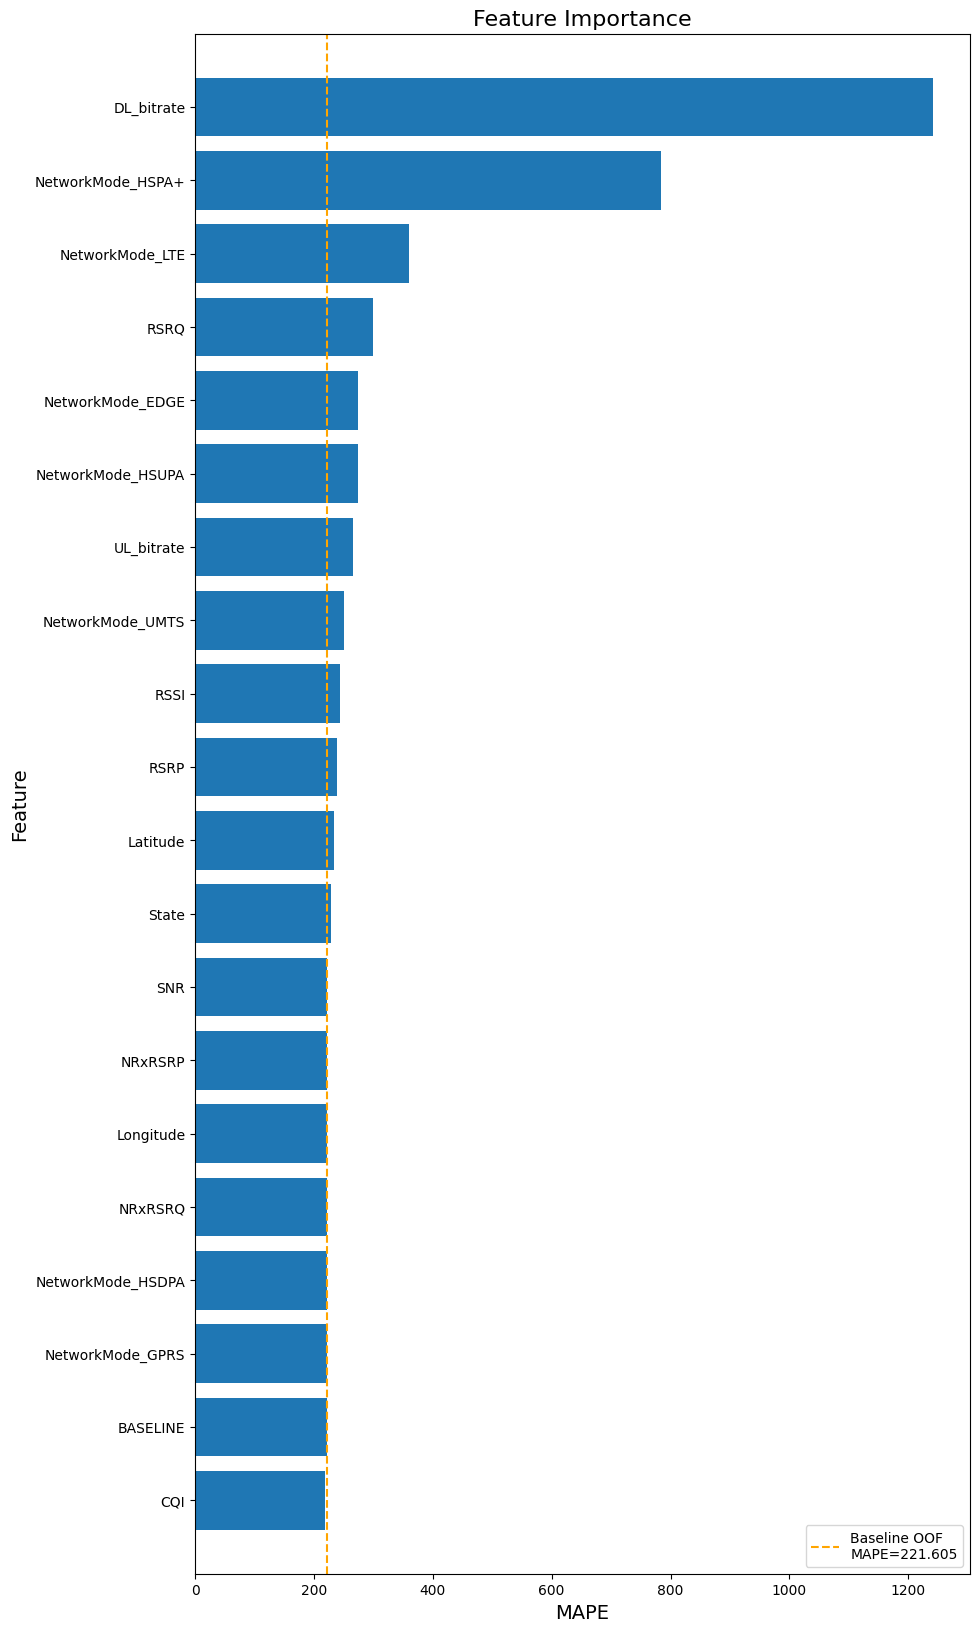

In [39]:
result_df = result_df.sort_values("mape")
plt.figure(figsize=(10,20))
plt.barh(np.arange(len(features)+1),result_df.mape)
plt.yticks(np.arange(len(features)+1),result_df.feature.values)
plt.title('Feature Importance',size=16)
plt.ylim((-1,len(features)+1))
plt.plot([baseline_mape,baseline_mape],[-1,len(features)+1], '--', color='orange',
            label=f'Baseline OOF\nMAPE={baseline_mape:.3f}')
plt.xlabel('MAPE',size=14)
plt.ylabel('Feature',size=14)
plt.legend()
plt.show()

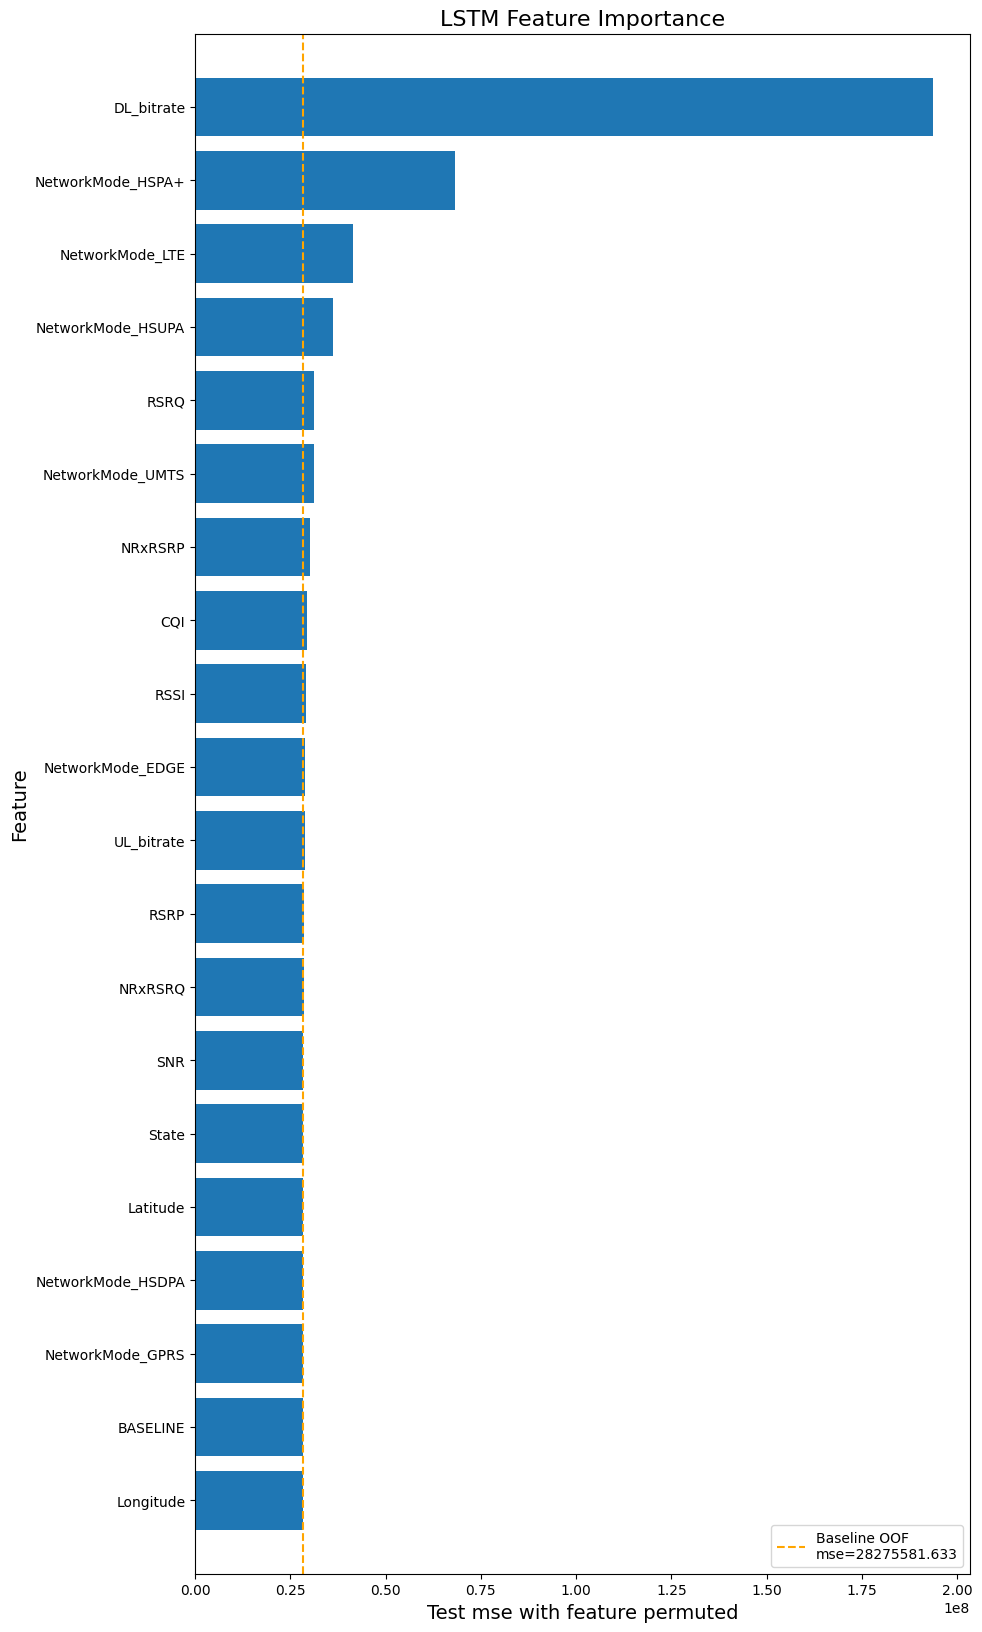

In [36]:
result_df = result_df.sort_values("mse")
plt.figure(figsize=(10,20))
plt.barh(np.arange(len(features)+1),result_df.mse)
plt.yticks(np.arange(len(features)+1),result_df.feature.values)
plt.title('LSTM Feature Importance',size=16)
plt.ylim((-1,len(features)+1))
plt.plot([baseline_mse,baseline_mse],[-1,len(features)+1], '--', color='orange',
            label=f'Baseline OOF\nmse={baseline_mse:.3f}')
plt.xlabel('Test mse with feature permuted',size=14)
plt.ylabel('Feature',size=14)
plt.legend()
plt.show()

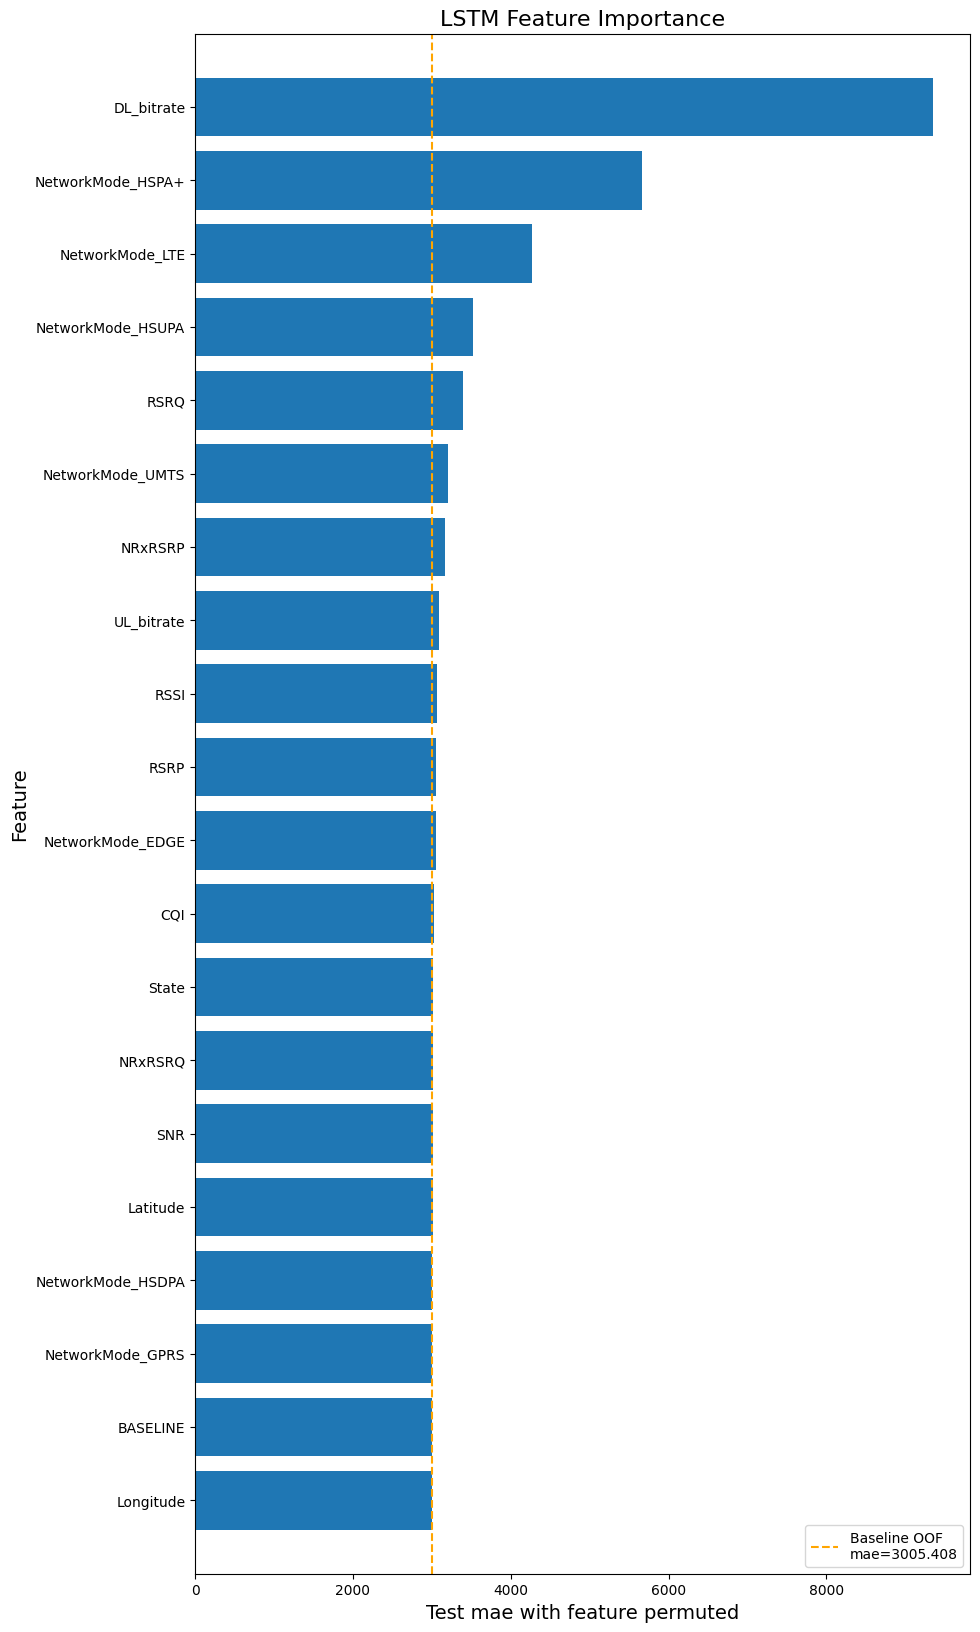

In [37]:
result_df = result_df.sort_values("mae")
plt.figure(figsize=(10,20))
plt.barh(np.arange(len(features)+1),result_df.mae)
plt.yticks(np.arange(len(features)+1),result_df.feature.values)
plt.title('LSTM Feature Importance',size=16)
plt.ylim((-1,len(features)+1))
plt.plot([baseline_mae,baseline_mae],[-1,len(features)+1], '--', color='orange',
            label=f'Baseline OOF\nmae={baseline_mae:.3f}')
plt.xlabel('Test mae with feature permuted',size=14)
plt.ylabel('Feature',size=14)
plt.legend()
plt.show()